# <center> Lab Exercise 1: Linear Regression
<center> Humberto Díaz <br>
The University of Winnipeg <br>
DIT 54110 AIW01: Introduction to Machine Learning <br>
Muhammad Shahin PhD. <br>
July 22, 2025.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv('/Users/eleazar/Documents/Projects/IML/datasets/Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Data Exploration

In [3]:
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


## Data Cleaning

Replace ``?`` with ``NaN`` and drop rows with missing values

In [5]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df = df.dropna()

In [6]:
# Convert horsepower to numeric
df['horsepower'] = df['horsepower'].astype(float)

/var/folders/dk/g6kdw5nj5hb8tlfg5r6rfn300000gn/T/ipykernel_6198/3807802209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype(float)


In [7]:
# Drop non-numeric column 'name'
df = df.drop(columns=['name'])

In [8]:
# Define features and target
X = df.drop(columns=['mpg'])
y = df['mpg']

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 1: Train and evaluate

Train and evaluate a multiple linear regression model to predict the target feature in the dataset

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [12]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression Performance:")
print(f"MSE: {lr_mse:.2f}")
print(f"R²: {lr_r2:.2f}")

Linear Regression Performance:
MSE: 10.71
R²: 0.79


## Task 2: Examine feature significance

In [13]:
feature_names = X.columns
coefficients = pd.DataFrame(lr_model.coef_, feature_names, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
              Coefficient
cylinders       -0.587055
displacement     1.565273
horsepower      -0.814205
weight          -5.157671
acceleration     0.106767
year             2.782555
origin           1.300240


## Task 3: Apply regularization (Ridge and Lasso)

In [14]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression Performance:")
print(f"MSE: {ridge_mse:.2f}")
print(f"R²: {ridge_r2:.2f}")


Ridge Regression Performance:
MSE: 10.77
R²: 0.79


In [15]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression Performance:")
print(f"MSE: {lasso_mse:.2f}")
print(f"R²: {lasso_r2:.2f}")


Lasso Regression Performance:
MSE: 10.05
R²: 0.80


## Task 4: Compare model performance

In [16]:
print("\nModel Performance Comparison:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")
print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}")
print(f"Lasso Regression - MSE: {lasso_mse:.2f}, R²: {lasso_r2:.2f}")


Model Performance Comparison:
Linear Regression - MSE: 10.71, R²: 0.79
Ridge Regression - MSE: 10.77, R²: 0.79
Lasso Regression - MSE: 10.05, R²: 0.80


## Task 5: Check for non-linear relationships

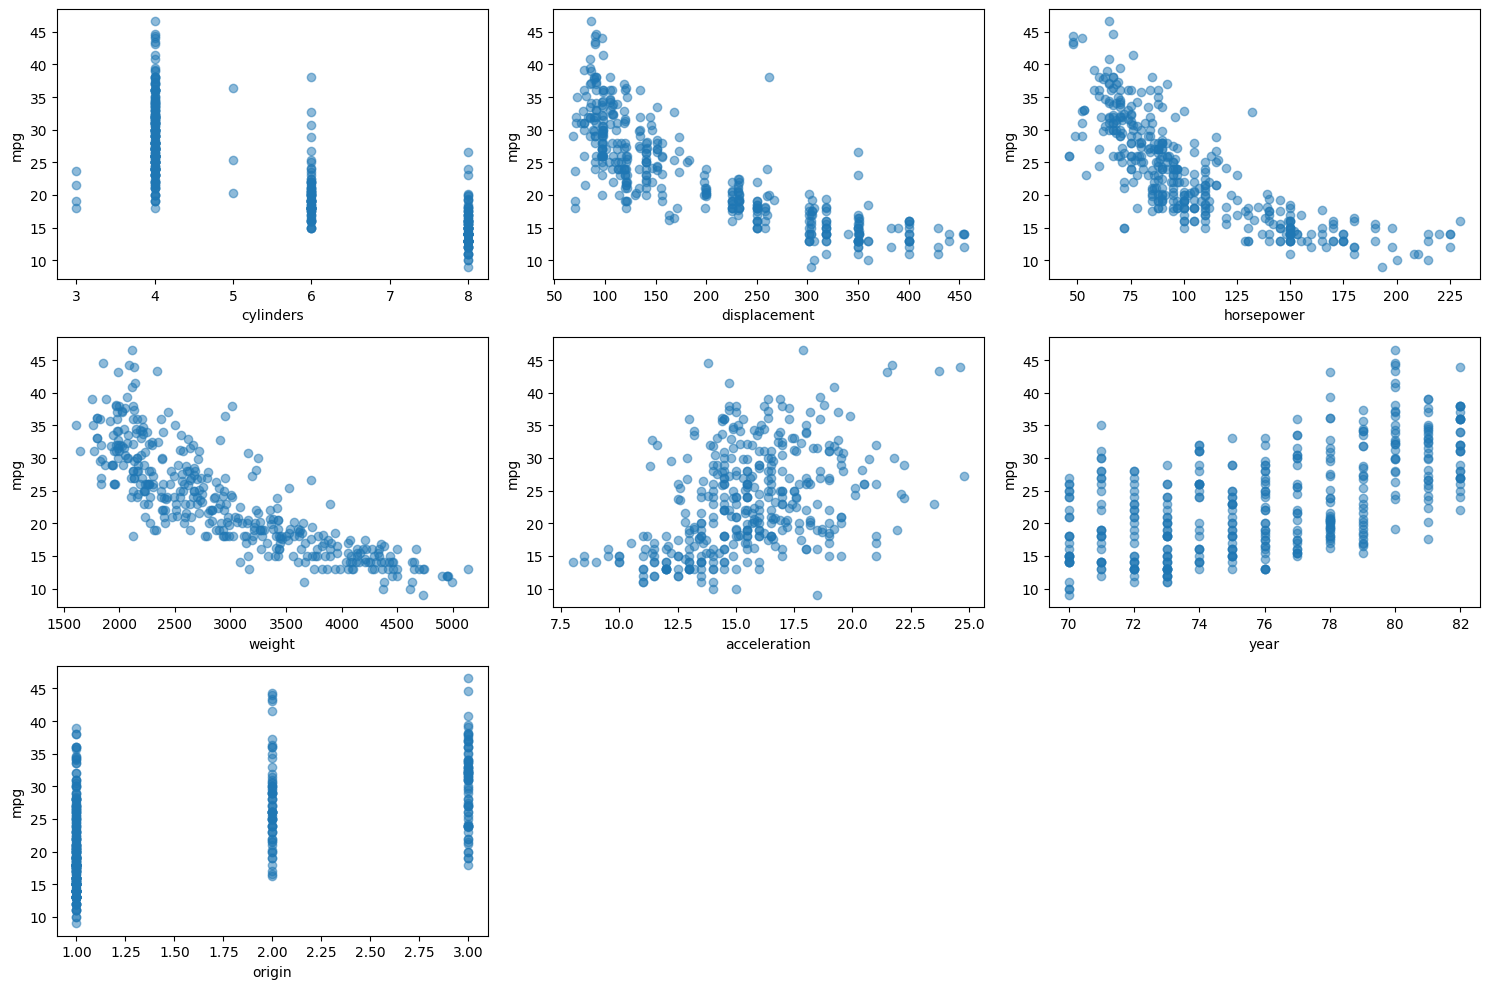

In [17]:
# Visualize relationships using scatter plot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('mpg')
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()
plt.close()

In [18]:
# Explore non-linearity with polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [19]:
# Train linear regression with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
print("\nPolynomial Regression (Degree 2) Performance:")
print(f"MSE: {poly_mse:.2f}")
print(f"R²: {poly_r2:.2f}")


Polynomial Regression (Degree 2) Performance:
MSE: 7.16
R²: 0.86


In [21]:
# Display results for report (instead of saving to file)
print("\nResults for Report:")
print("Linear Regression Performance:")
print(f"MSE: {lr_mse:.2f}")
print(f"R²: {lr_r2:.2f}")
print("\nFeature Coefficients:")
print(coefficients)
print("\nRidge Regression Performance:")
print(f"MSE: {ridge_mse:.2f}")
print(f"R²: {ridge_r2:.2f}")
print("\nLasso Regression Performance:")
print(f"MSE: {lasso_mse:.2f}")
print(f"R²: {lasso_r2:.2f}")
print("\nPolynomial Regression (Degree 2) Performance:")
print(f"MSE: {poly_mse:.2f}")
print(f"R²: {poly_r2:.2f}")


Results for Report:
Linear Regression Performance:
MSE: 10.71
R²: 0.79

Feature Coefficients:
              Coefficient
cylinders       -0.587055
displacement     1.565273
horsepower      -0.814205
weight          -5.157671
acceleration     0.106767
year             2.782555
origin           1.300240

Ridge Regression Performance:
MSE: 10.77
R²: 0.79

Lasso Regression Performance:
MSE: 10.05
R²: 0.80

Polynomial Regression (Degree 2) Performance:
MSE: 7.16
R²: 0.86


## Conclusion

There is evidence of non-linear relationships between the input variables and mpg, as indicated by the scatter plots' potential curved patterns and the significant improvement in R² (from 0.79 to 0.86) when using polynomial features. To deal with this non-linearity, the current polynomial regression approach is a good start, and further refinement could involve testing higher-degree polynomials or alternative non-linear models, depending on the observed patterns in the scatter plots.